# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [5]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [6]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


<img src="mapacentros.png">

In [7]:
def Compare(node):
    return node.cost

In [27]:
# Implementar
if __name__ == "__main__":
    connections = {
        'casa': {'centro educativo Nova':1.8},
        'centro educativo Nova': {'casa':1.8 , 'Escuela ABC':1.4, 'centro de desarrollo infantil pulgarcito':1.6},
        'Escuela ABC': {'centro educativo Nova':1.4},
        'centro de desarrollo infantil pulgarcito': {'centro de educacion inicial particular bambi':3.2, 
                                                     'centro de educacion inicial la ronda':2, 
                                                     'centro de educacion inicial grabatos':1.8, 
                                                     'carrusel centro de educacion inicial':1.8},
        'carrusel centro de educacion inicial': {'centro de desarrollo infantil pulgarcito':1.8},
        'centro de educacion inicial particular bambi': {'centro de desarrollo infantil pulgarcito':3.2},
        'centro de educacion inicial la ronda': {'centro de desarrollo infantil pulgarcito':2, 
                                                 'centro educativo liceo del azuay':1.1},
        'centro de educacion inicial grabatos': {'centro de desarrollo infantil pulgarcito':1.8, 
                                                 'crayola centro de educacion inicial':0.45, 
                                                 'centro infantil el canino':0.75, 'Centro educativo san Andres':1},
        'crayola centro de educacion inicial': {'centro de educacion inicial grabatos':0.45},
        'Centro educativo san Andres': {'centro de educacion inicial grabatos':1, 'Centro educativo los pinos':0.75, 
                                        'Centro educativo infantil letras y vida':0.7, 
                                        'centro de nivelacion pedagogica y control':0.4},
        'Centro educativo infantil letras y vida': {'Centro educativo san Andres':0.7}, 
        'centro de nivelacion pedagogica y control': {'Centro educativo san Andres':0.4},
        'centro infantil el canino': {'centro de educacion inicial grabatos':0.75, 
                                      'centro infantil mis enanitos':1.2, 'CEBCI unidad educativa':1.4},
        'centro infantil mis enanitos': {'centro infantil el canino':1.2}, 
        'CEBCI unidad educativa': {'centro infantil el canino':1.4},
        'centro educativo liceo del azuay': {'centro de educacion inicial la ronda':1.1, 
                                             'Lo magico de aprender centro psicopedagogico':0.7},
        'Lo magico de aprender centro psicopedagogico': {'centro educativo liceo del azuay':0.7},
        'Centro educativo los pinos': {'Centro educativo san Andres':0.75, 'Mi pequeno mundo':1.9},
        'Mi pequeno mundo': {'Centro educativo los pinos':1.9}
    } 

def search_profundidad(init_node, solution, visited,coste):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        print (coste)
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in connections[node_data]: 
            child = Node(node)
            child.cost = connections[node_data][node]
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                #sumamos el costo de los nodos hijos
                coste = coste + node_son.cost
                Solution = search_profundidad(node_son, solution, visited,coste) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        
        return None

init_state = 'casa' # Creamos un estado inicial
solution = 'centro de educacion inicial grabatos' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None
coste = 0 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited,coste) # Llamamos la metodo de busqueda

# Mostrar Resultado

result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)


6.6000000000000005
['casa', 'centro educativo Nova', 'centro de desarrollo infantil pulgarcito', 'centro de educacion inicial grabatos']


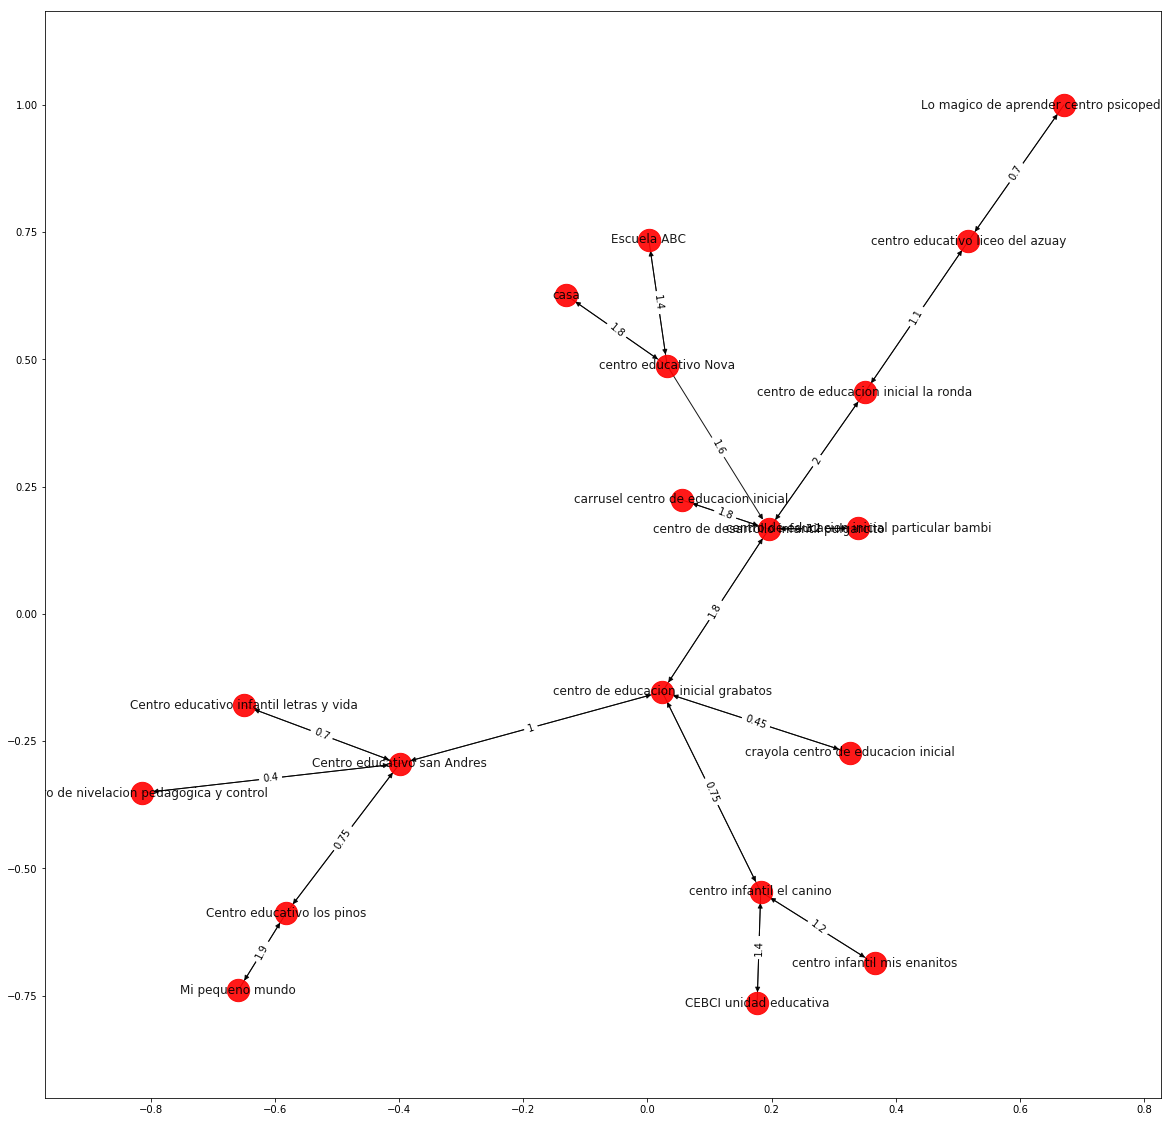

In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
 
def graficar(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos) 
    for valor, listaValor in datos.items():
        for a in listaValor:  
            graf.add_edge(valor,a,size=250)
            graf.add_edge(valor,a,weight=datos[valor][a])
    
    plt.figure(figsize=(20,20)) 
    #nx.draw_networkx(graf, node_color = 'yellow', with_label = True, node_size=2000)
    #plt.show()
    pos=nx.spring_layout(graf)
    edge_labels = nx.get_edge_attributes(graf,'weight')   
    nx.draw_networkx_edge_labels(graf, pos, edge_labels = edge_labels) 
    nx.draw_networkx(graf, pos, node_color = "red", node_size=500, alpha=0.9, labels={node:node for node in graf.nodes()})
    plt.show()


graficar(connections)


In [22]:
def Reinas(matrizReinas, cont, numeroReinas):
    if cont >= numeroReinas:
        return False

    fin = False  # inicializamos fin en False

    while True:

        if (matrizReinas[
            cont] < numeroReinas):  # si el valor de la columna para la fila es mayor o igual que 4, entonces no seguimos incrementando, con esto evitamos indices fuera del array.
            
            matrizReinas[cont] = matrizReinas[
                                     cont] + 1  # incrementamos el valor de columna para la reina i-esima de la fila i-esima.

        if (Valido(matrizReinas,
                   cont)):  # si la reina esta en la fila i de la columna j en la etapa del contador no encuentra otra reina para continuar.

            if cont != numeroReinas - 1:  # si aun no hemos acabado todas las iteraciones de poner todas las reinas, procedemos a la siguiente etapa.

                fin = Reinas(matrizReinas, cont + 1, numeroReinas)

                if fin == False:  # si del valor devuelto de Reinas tenemos falso, ponemos a 0 el valor del cont + 1.
                    matrizReinas[cont + 1] = 0


            else:

                print(
                    matrizReinas)  # si ya hemos acabado, imprimimos la disposicion de las fichas en el tablero y devolvemos True.
                for x in range(numeroReinas):
                    for i in range(numeroReinas):
                        if matrizReinas[x] == i + 1:
                            print("X")
                        else:
                            print("- ")

                    print("\n")
                fin = True
        if (matrizReinas[
            cont] == numeroReinas or fin == True):  # si el valor de la columna j de la etapa k es igual a 4 o fin es igual a True, salimos del bucle y devolvemos fin.
            break
    return fin


def Valido(matrizValidar, cont):
    # Comprueba si el vector que se tiene con i filas y j columnas es la solucion
    for i in range(cont):
        if (matrizValidar[i] == matrizValidar[cont]) or (
                validarfilacolum(matrizValidar[i], matrizValidar[cont]) == validarfilacolum(i, cont)):
            return False
    return True


def validarfilacolum(x, y):
    #pruebas para hace el cambio.
    if x > y:
        return x - y
    else:
        return y - x


n = int(4)
solucion = []
for i in range(n):
    solucion.append(0)
etapa = 0

Reinas(solucion, etapa, n)

[2, 4, 1, 3]
- 
X
- 
- 


- 
- 
- 
X


X
- 
- 
- 


- 
- 
X
- 




True

# Conclusiones

Dentro del desarrollo del metodo por profundiad se nota que el costo es igual a todos los nodos que explora, para poder llegar al nodo meta.
El costo total se e reflejado por aquellos nodos que son explorados, mas no por el menor costo como es en la busqueda por costo uniforme, aqui explora todas sus ramas hasta el final. 
Dentro del problema de las reinas se puede observar que en un vector se ubica las solucines de la posicion en la columan que se encuentra verificando si se peude ubicar en cada espacio del tablero de la fila y la columna. la verificacion de si existe otra reina se realiza por 2 funciones aartes las cuales valifda la columna y la fila cada ves que vuelve a llamar al metodo